In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [28]:
company = "AAPL"
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 1)

data = yf.download(company, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25


2024-01-28 13:44:44.074605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-28 13:44:44.075258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-28 13:44:44.075650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

61/61 [==============================] - 2s 20ms/step - loss: 0.0100
Epoch 2/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0021
Epoch 3/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 4/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0017
Epoch 5/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 6/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0017
Epoch 7/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 8/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0015
Epoch 9/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 10/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 11/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 12/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 13/25
61/61 [=============================

In [34]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company, start=test_start, end=test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed


In [36]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
   
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

32/32 [==============================] - 0s 6ms/step


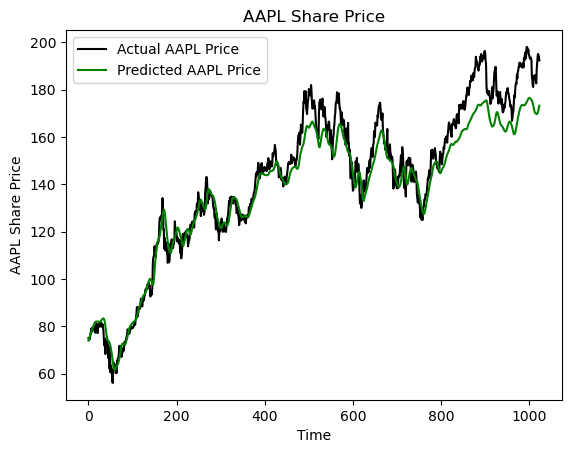

In [37]:
plt.plot(actual_prices, color='black', label=f"Actual {company} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [40]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 21ms/step
Prediction: [[173.92569]]
